# PROBLEM STATEMENT

This data set consists of the physical parameters of three species of flower — Versicolor, Setosa and Virginica. 
The numeric parameters which the dataset contains are Sepal width, Sepal length, Petal width and Petal length. 
In this data we will be predicting the classes of the flowers based on these parameters.The data consists of 
continuous numeric values which describe the dimensions of the respective features. We will be training the model 
based on these features.

# Following are the steps involved in creating a well-defined ML project:

1). Understand and define the problem

2). Prepare the data

3). Explore and Analyse the data

4). Apply the algorithms

5). Reduce the errors

6). Predict the result



##  Import Data & Required Packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [4]:
data=sns.load_dataset("iris")

## Top 5 Records

In [5]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Diplay Unique Feature

In [6]:
data["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Check for datatypes & Null values

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Summary of the data

In [8]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Check Null Values

In [9]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Out of 3 Species,removing 1 for Binary Classification in Logistic Regression

In [14]:
df=data[data["species"]!="setosa"]

In [15]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Data Analysis & Visualization

## Converting categorical values to numerical

In [16]:
df["species"]=df["species"].map({"versicolor":0,"virginica":1})

C:\Users\Dell\AppData\Local\Temp\ipykernel_10892\796223801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["species"]=df["species"].map({"versicolor":0,"virginica":1})


In [17]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [54]:
num_fea = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_fea = [feature for feature in df.columns if df[feature].dtype == 'O']

In [55]:
num_fea

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

## Univariate Analysis

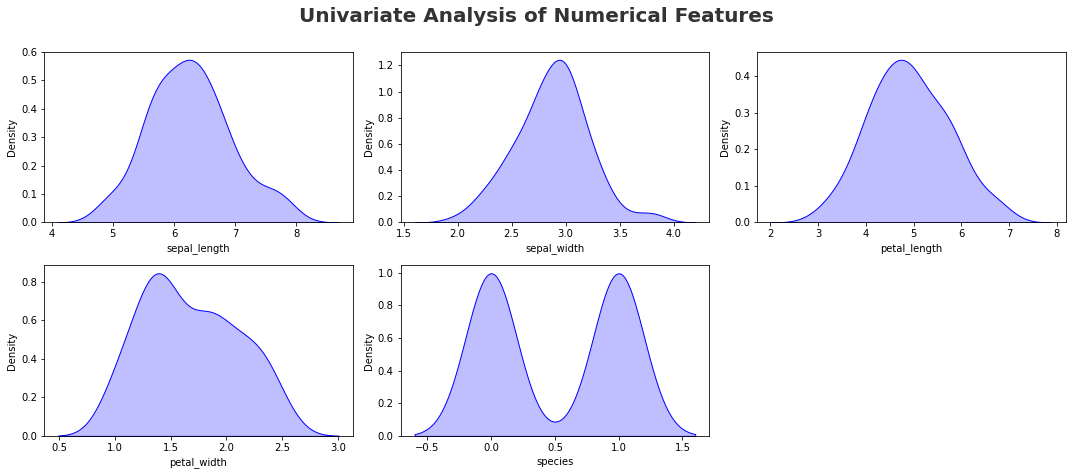

In [58]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_fea)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[num_fea[i]],shade=True, color='b')
    plt.xlabel(num_fea[i])
    plt.tight_layout()

#### Observation: 
We observe that almost all the features are somewhat normaly distributed

## Outlier Check

<AxesSubplot:xlabel='sepal_length'>

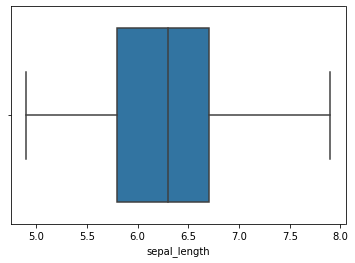

In [49]:
sns.boxplot(x=df["sepal_length"])

<AxesSubplot:xlabel='sepal_width'>

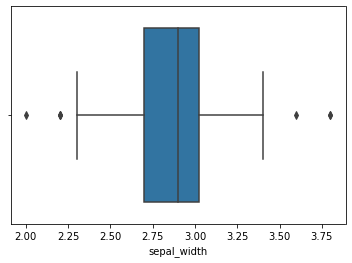

In [50]:
sns.boxplot(x=df["sepal_width"])

<AxesSubplot:xlabel='petal_length'>

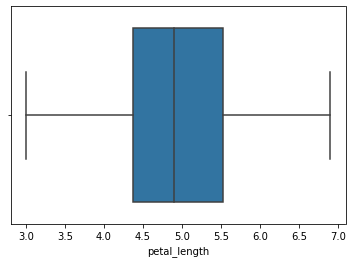

In [51]:
sns.boxplot(x=df["petal_length"])

<AxesSubplot:xlabel='petal_width'>

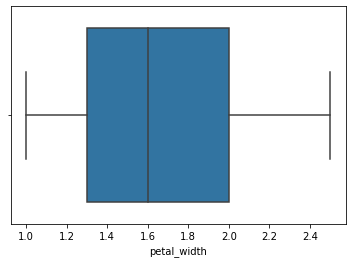

In [52]:
sns.boxplot(x=df["petal_width"])

#### Observation:
It is seen that sepat width has few outliers

## Multiple pairwise bivariate distribution

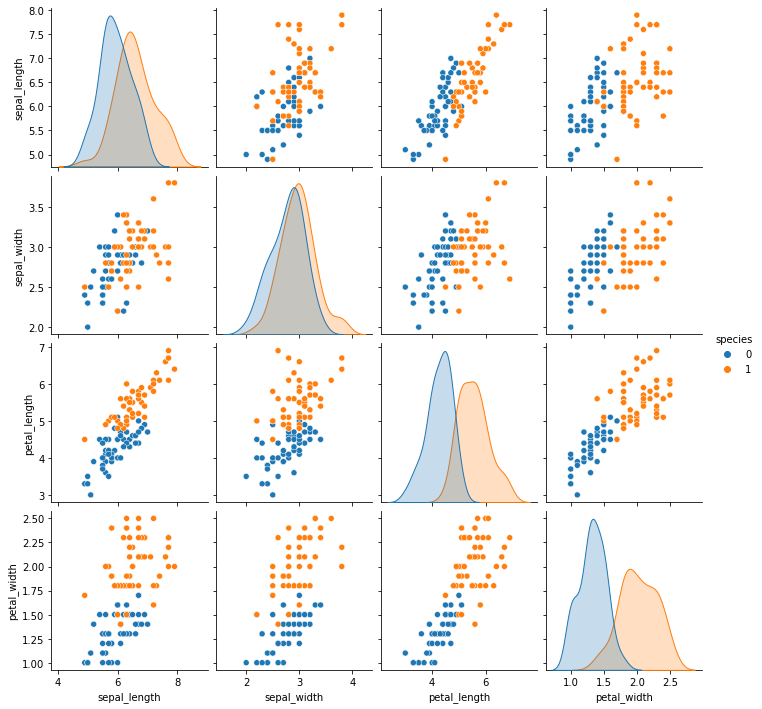

In [59]:
sns.pairplot(df,hue="species")

## Check Correlation

In [60]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,0.553855,0.828479,0.593709,0.494305
sepal_width,0.553855,1.000000,0.519802,0.566203,0.308080
petal_length,0.828479,0.519802,1.000000,0.823348,0.786424
petal_width,0.593709,0.566203,0.823348,1.000000,0.828129
species,0.494305,0.308080,0.786424,0.828129,1.000000


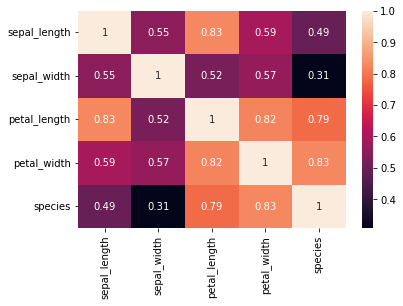

In [61]:
#Let us check if the variables are correlated in any way:
plt.tick_params(labelsize=10)
sns.heatmap(df.corr(),annot=True);

#### Observation:
There is very high correlation between all the variables

# Model Training

## Train-Test-Split

In [21]:
#Splitting into independent & dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [23]:
X

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
y

50     0
51     0
52     0
53     0
54     0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 100, dtype: int64

## Import train-test-split

In [25]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [66]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
78,6.0,2.9,4.5,1.5
143,6.8,3.2,5.9,2.3
55,5.7,2.8,4.5,1.3
116,6.5,3.0,5.5,1.8
115,6.4,3.2,5.3,2.3
...,...,...,...,...
110,6.5,3.2,5.1,2.0
121,5.6,2.8,4.9,2.0
64,5.6,2.9,3.6,1.3
142,5.8,2.7,5.1,1.9


## Traing the sample using Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

## Check Optimal Parameter 

In [31]:
from sklearn.model_selection import GridSearchCV
param={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,12,29,34,50],'max_iter':[100,200,300]}

In [35]:
classifier_regressor=GridSearchCV(classifier,param_grid=param,scoring='accuracy',cv=5)

## Trainig the data

In [83]:
classifier_regressor.fit(X_train,y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Value

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 12, 29, 34, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [84]:
print(classifier_regressor.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [85]:
print(classifier_regressor.best_score_)

0.9714285714285715


## Model prediction

In [86]:
#prediction
y_pred=classifier_regressor.predict(X_test)

In [90]:
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

## Check Model Accuracy

In [87]:
#accuracy score
from sklearn.metrics import accuracy_score,classification_report


In [88]:
score=accuracy_score(y_pred,y_test)

In [89]:
print(score)

0.9393939393939394


## Report

In [82]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.93      0.87      0.90        15

    accuracy                           0.91        33
   macro avg       0.91      0.91      0.91        33
weighted avg       0.91      0.91      0.91        33

